In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import *
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import *
from keras.optimizers import *
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import *

import os

import PIL

Using TensorFlow backend.


In [2]:
def read_and_resize_single_img(filename,nrow=224,ncol=224,channels=3):
    from scipy import misc
    arr = misc.imread(filename)
    arr = misc.imresize(arr,size=(nrow,ncol,channels))
    return arr

def read_train_from_dirs(path = '../input/train',num_imgs_per_class=5,skip=0,nrow=224,ncol=224,channels=3):
    import glob
    filelist = glob.glob(path + '*/*.jpg')
    print('heloooo1111oo')
    categories = [l.split('\\')[-2] for l in filelist]
    k2v = {i:l for i,l in enumerate(np.unique(categories))}
    v2k = {l:i for i,l in enumerate(np.unique(categories))}
    print('heloooo2222oo')
    l = [[t,v2k[t]] for t in categories]
    labels_df = pd.DataFrame(l,columns=['category','cat_num'])
    labels_df['filenames'] = filelist
    labels_indexes = np.array([np.where(labels_df.cat_num==c)[0][skip:skip+num_imgs_per_class] 
                               for c in labels_df.cat_num.unique()[:20]])
    filtered = labels_df.iloc[labels_indexes.flatten(),:]
    num_imgs = filtered.shape[0]
    X = np.zeros((num_imgs,nrow,ncol,channels))
    for i in range(filtered.shape[0]):
        arr=read_and_resize_single_img(filtered.loc[:,'filenames'].iloc[i],nrow,ncol,channels)
        if len(arr.shape)<3: arr = np.stack([arr,arr,arr],axis=-1) #change to use np.repeat() for more generalizable
        X[i] = np.float16(arr)
    y = filtered.loc[:,'cat_num'].values
    print('hello!')
    return X,y,k2v,v2k

In [3]:
def plot_multiple_imgs(data,nrows=4,ncols=4,figsize=(18,18)):
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)
    for i in range(nrows*ncols):
        ax[i%nrows,i//nrows].imshow(data[i])

In [4]:
%%time
num_tr_imgs=10222
X_train,y_train,k2v,v2k = read_train_from_dirs(num_imgs_per_class=num_tr_imgs)

heloooo1111oo
heloooo2222oo
hello!
Wall time: 2min 9s


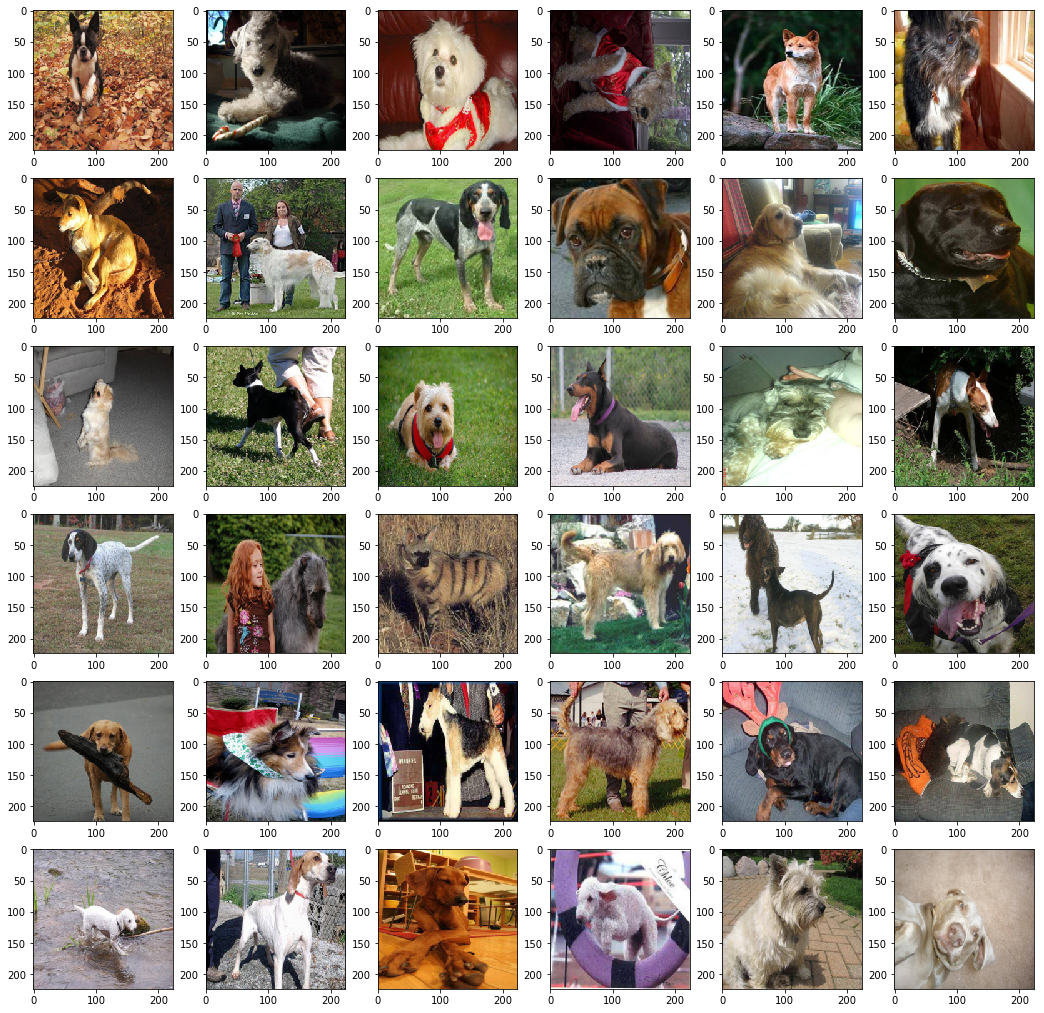

In [5]:
plot_multiple_imgs(X_train/255,6,6)